<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Renewable-Energy-Project/blob/main/Linear_Regression_Solar_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Renewable-Energy-Project.git

Cloning into 'Renewable-Energy-Project'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 109 (delta 14), reused 6 (delta 6), pack-reused 84
Receiving objects: 100% (109/109), 838.76 KiB | 6.55 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import csv
from scipy import stats

## Regression

In [3]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/solar-pv-cumulative-capacity.csv")

In [4]:
df

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,1.112425
1,Africa,NaN,1997,3.137276
2,Africa,NaN,1998,5.162126
3,Africa,NaN,1999,8.199402
4,Africa,NaN,2000,10.927000
...,...,...,...,...
1654,World,OWID_WRL,2017,390206.530000
1655,World,OWID_WRL,2018,483011.800000
1656,World,OWID_WRL,2019,584685.700000
1657,World,OWID_WRL,2020,710281.100000


In [5]:
X_year = np.array(df[df['Code'] == 'OWID_WRL']['Year'])

In [19]:
Y_cons = np.log10(np.array(df[df['Code'] == 'OWID_WRL']['Solar Capacity']))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_year.reshape(-1, 1), Y_cons.reshape(-1, 1) , test_size=0.5)

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit( X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [34]:
from matplotlib.lines import MarkerStyle
# The coefficients
print("Coefficients: %f " % regr.coef_)
# The intercept
print("intercept: %f " % regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 0.161138 
intercept: -319.414470 
Mean squared error: 0.02
Coefficient of determination: 0.99


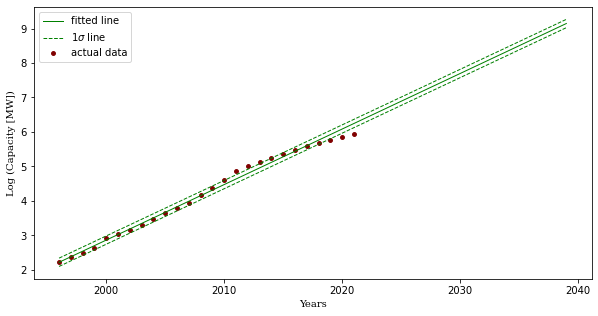

In [38]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))
# Plot outputs
axe.scatter(X_train, y_train, color="maroon" , s = 15 , label= "actual data" )
axe.scatter(X_test, y_test, color="maroon" , s = 15 )

X_future = np.array([range(1996,2040,1)]).reshape(-1,1)
y_future = regr.predict(X_future)
sigma = np.sqrt(np.var(y_future[0:len(Y_cons.reshape(-1))].reshape(-1) - Y_cons.reshape(-1)))

axe.plot(X_future , y_future , color="green", linewidth=1 , label = "fitted line")
axe.plot(X_future , y_future - sigma , color="green", linewidth=1,  linestyle='dashed' , label = '1$\sigma$ line'  )
axe.plot(X_future , y_future + sigma , color="green", linewidth=1,  linestyle='dashed' )


#axe.set_title("Energy consumption in the world from 1965 to 2021 \n and a fitted regression line with its 1$\sigma$ lines" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('Log (Capacity [MW])', fontname = 'serif')
plt.legend()

plt.savefig('Solar_Cell_Capacity.png',dpi=2000)